In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf 

In [3]:
df = pd.read_csv('AAPL.csv')
print('Initial dataset:')
print(df.head())

Initial dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980/12/12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1  1980/12/15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2  1980/12/16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3  1980/12/17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4  1980/12/18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600


In [4]:
# check for duplicates
duplicate_dates = df[df.duplicated(subset='Date')]
print("Duplicate Dates:")
print(duplicate_dates)

Duplicate Dates:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [5]:
# check for missing values
print('Checking for missing values')
print(df.isnull().sum())

Checking for missing values
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Convert 'Date' column to datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

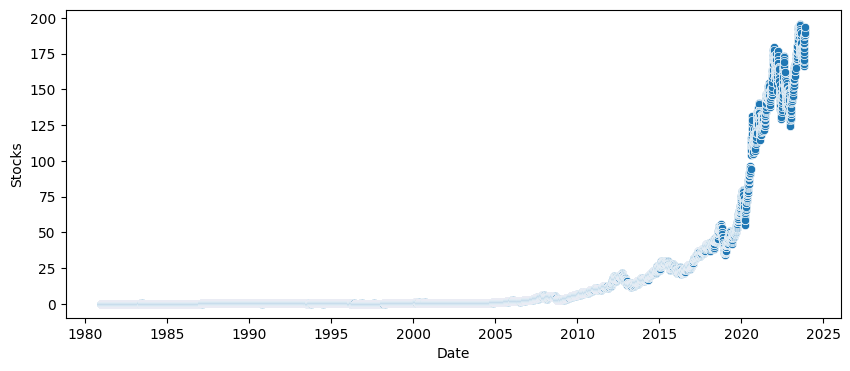

In [10]:
# Plotting Scatter Plot
plt.figure(figsize=(10, 4))
sns.scatterplot(df['Adj Close'])
# plt.title('Apple Stocks from 1980 to 2023')
plt.ylabel('Stocks')
plt.xlabel('Date')
# plt.xticks(rotation=90)
plt.savefig('Apple Stocks from 1980 to 2023')
plt.show()

<Figure size 800x600 with 0 Axes>

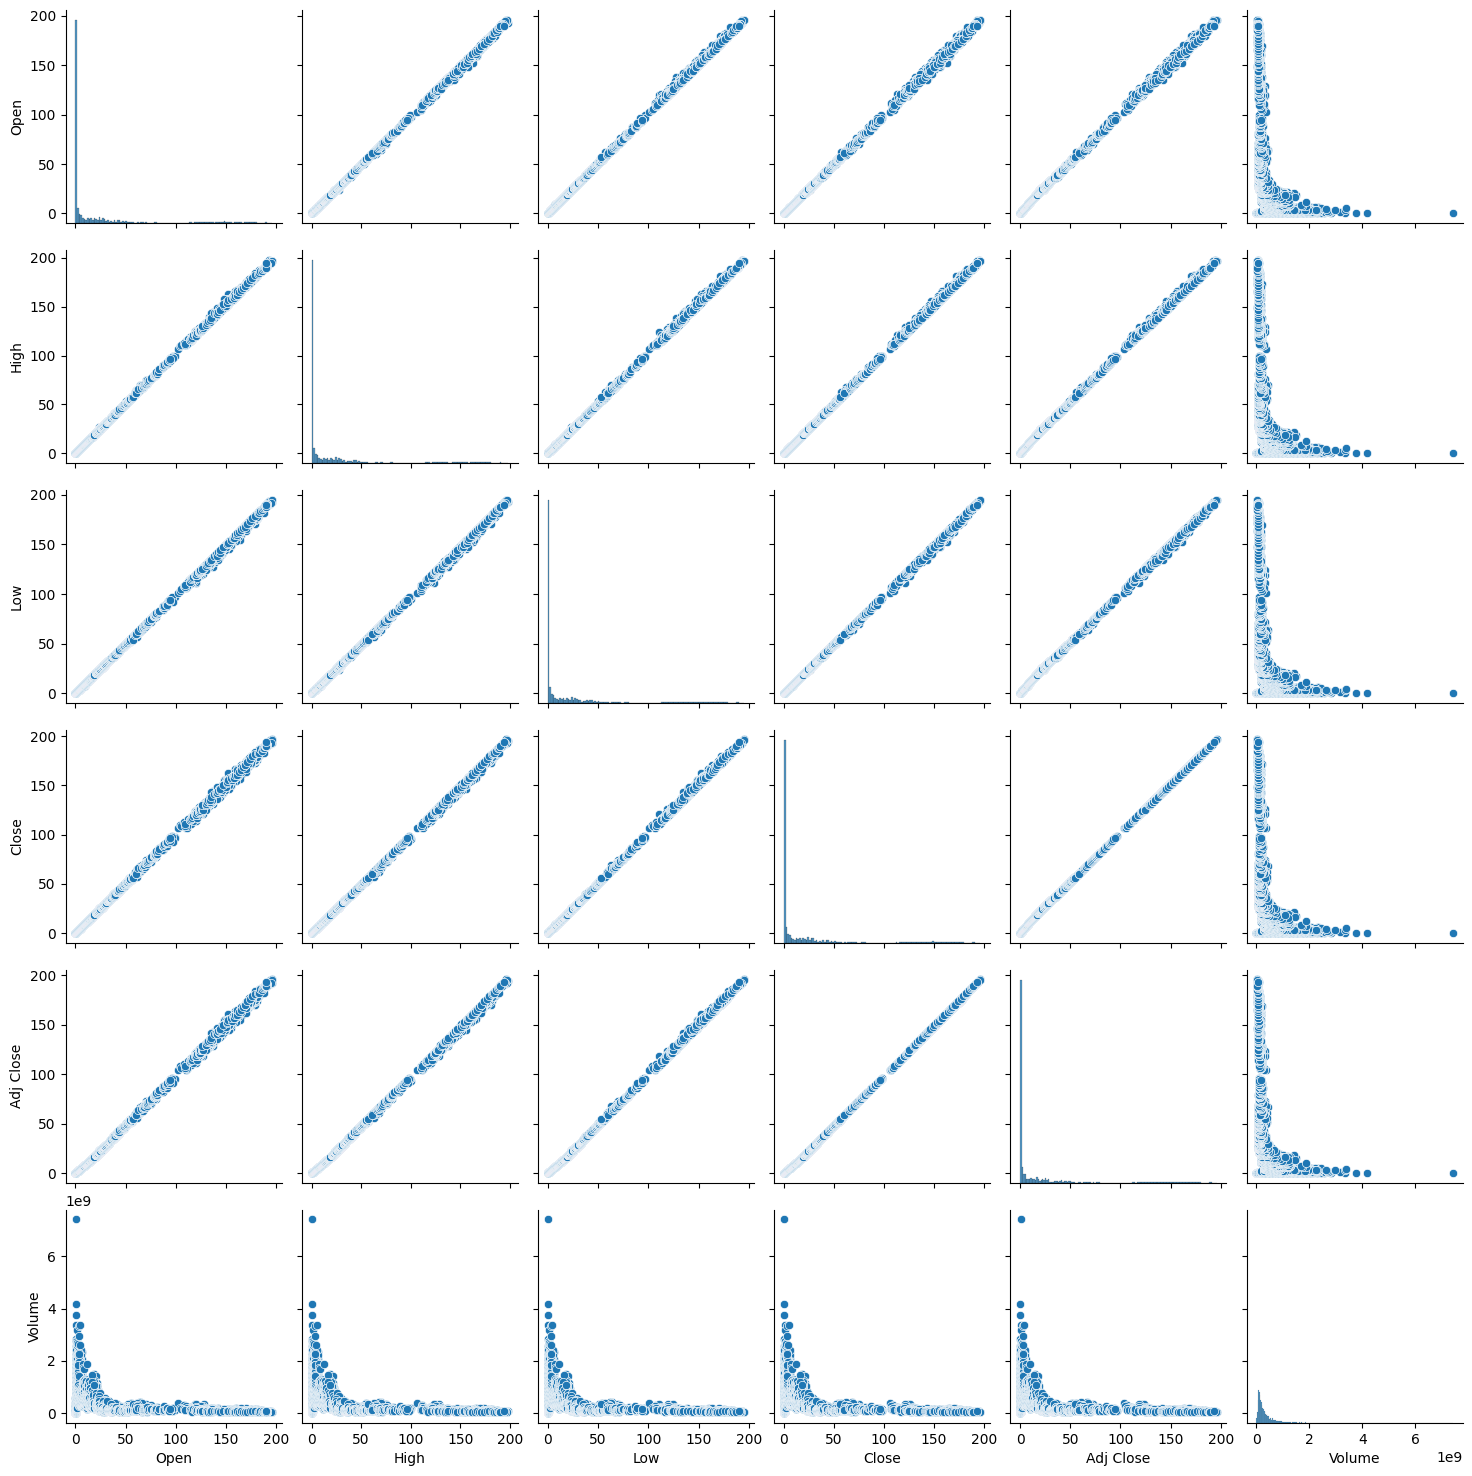

In [14]:
# Pairplot to visualize relationships between different features
plt.figure(figsize=(8, 6))
sns.pairplot(df)
# plt.title('Pairplot of Features')
plt.savefig('Pairplot of Features')
plt.show()

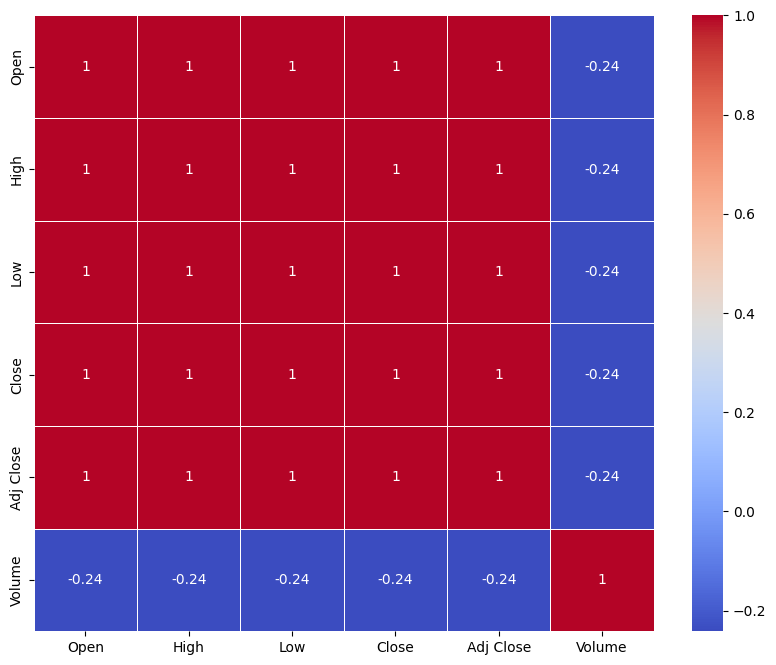

In [15]:
# Correlation matrix to identify linear relationships
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
# plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix')
plt.show()

In [16]:
# Extract the 'Close' column for further analysis
closing_prices = df.filter(['Close']).values

In [17]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

In [18]:
# Create training dataset
train_data = scaled_prices[:int(len(scaled_prices) * 0.95), :]
train_features, train_labels = [], []

In [19]:
# Prepare training data
for i in range(60, len(train_data)):
  train_features.append(train_data[i-60:i, 0])
  train_labels.append(train_data[i, 0])

In [20]:
train_features, train_labels = np.array(train_features), np.array(train_labels)

In [21]:
# Reshape the data for LSTM
train_features = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Fit the model to the training data
model.fit(train_features, train_labels, epochs=25, batch_size=32)

Epoch 1/25
320/320 [==============================] - 14s 24ms/step - loss: 4.4707e-04
Epoch 2/25
320/320 [==============================] - 7s 23ms/step - loss: 7.4687e-05
Epoch 3/25
320/320 [==============================] - 7s 23ms/step - loss: 7.4743e-05
Epoch 4/25
320/320 [==============================] - 7s 23ms/step - loss: 6.0995e-05
Epoch 5/25
320/320 [==============================] - 7s 23ms/step - loss: 7.3371e-05
Epoch 6/25
320/320 [==============================] - 7s 23ms/step - loss: 4.9560e-05
Epoch 7/25
320/320 [==============================] - 8s 25ms/step - loss: 6.9026e-05
Epoch 8/25
320/320 [==============================] - 9s 29ms/step - loss: 4.5444e-05
Epoch 9/25
320/320 [==============================] - 9s 27ms/step - loss: 3.8815e-05
Epoch 10/25
320/320 [==============================] - 9s 28ms/step - loss: 3.8355e-05
Epoch 11/25
320/320 [==============================] - 9s 27ms/step - loss: 3.8730e-05
Epoch 12/25
320/320 [==============================

In [25]:
# Create the testing dataset
test_data = scaled_prices[int(len(scaled_prices) * 0.95) - 60:, :]
x_test, y_test = [], closing_prices[int(len(closing_prices) * 0.95):, :]

In [26]:
# Prepare testing data
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 16ms/step


In [28]:
training_set = df.iloc[:int(len(closing_prices) * 0.95)]
validation_set = df.iloc[int(len(closing_prices) * 0.95):]
validation_set.loc[:, 'Predictions'] = predictions.copy()

C:\Users\Lirz3\AppData\Local\Temp\ipykernel_11056\3477981132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set.loc[:, 'Predictions'] = predictions.copy()


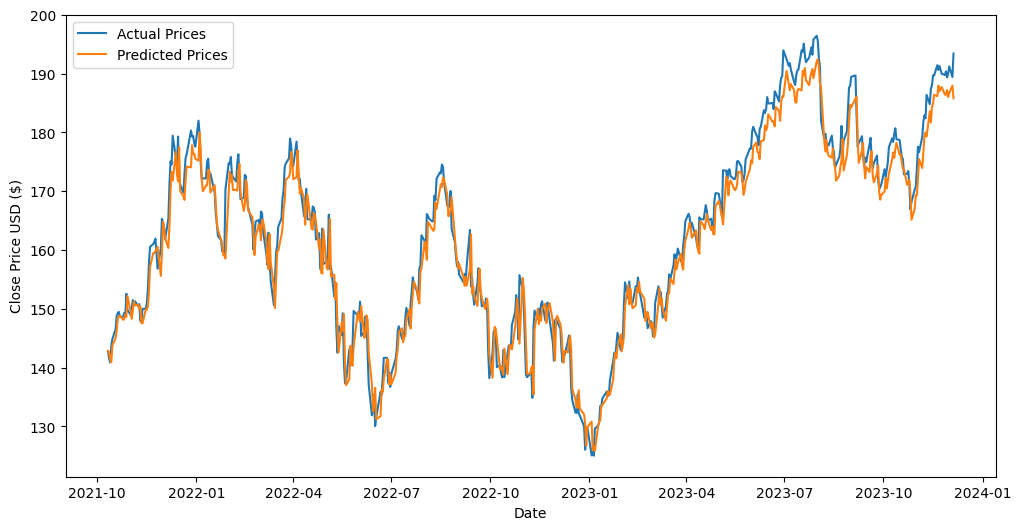

In [38]:
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(validation_set['Close'], label='Actual Prices')
plt.plot(validation_set['Predictions'], label='Predicted Prices')
plt.legend()
plt.savefig('Stock Price Prediction using LSTM')
plt.show()

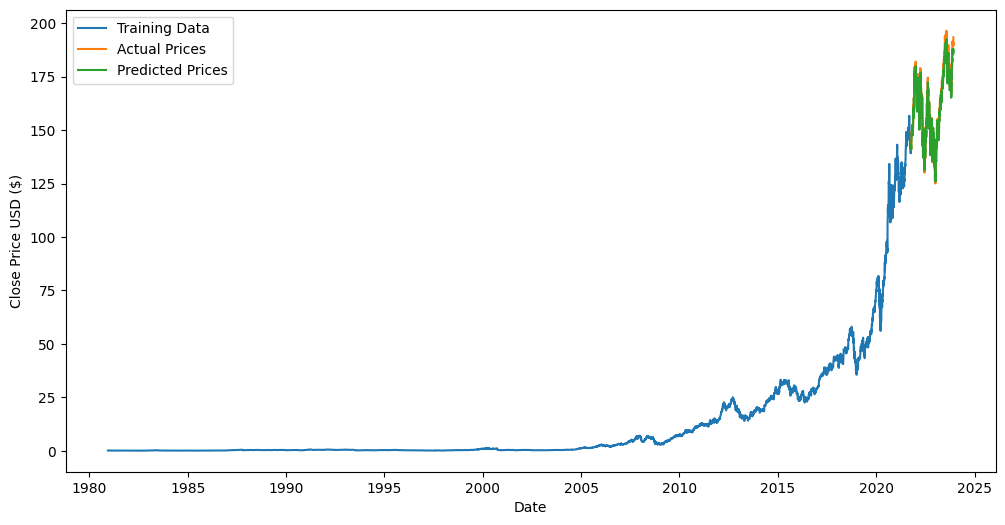

In [39]:
# Visualize the predicted prices compared to actual prices
plt.figure(figsize=(12, 6))
# plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(training_set['Close'], label='Training Data')
plt.plot(validation_set[['Close', 'Predictions']], label=['Actual Prices', 'Predicted Prices'])
# plt.legend(loc='lower right')
plt.legend()
plt.savefig('Stock Price Trend using LSTM')
plt.show()

In [40]:
# Model Evaluation Metrics
mse_lstm = mean_squared_error(validation_set['Close'], validation_set['Predictions'])
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(validation_set['Close'], validation_set['Predictions'])
r2_lstm = r2_score(validation_set['Close'], validation_set['Predictions'])

print('LSTM Model Evaluation:')
print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'R2 Score: {r2_lstm:.2f}')

LSTM Model Evaluation:
MSE: 10.92
RMSE: 3.30
MAE: 2.64
R2 Score: 0.96
